# cygnus-actiondist
10/17/2023

Compare the action distributions of Cygnus and Pythia, to understand overfitting and width prefetching
- *Reference*: Multi-Armed Bandits paper
- *Build*: 2022 ChampSim with DRAMsim3 (**TODO**)

In [41]:
from collections import defaultdict
from importlib import reload
import os
import sys
import toml
from typing import List, Optional

import matplotlib.pyplot as plt
from matplotlib import colormaps
import numpy as np
import pandas as pd
from IPython.display import display

sys.path.append('../../')
from naboo_utils.util import naboo_open
from naboo_utils import file, table
from plot_utils import collate, plot

# Results

In [42]:
sim_dir = "/u/cmolder/GitHub/ChampSim/sim/dram_dramsim3_2022/default_3200/"
baseline_study = "baseline"
baseline_experiment = "_baseline"
weights_path = "/u/cmolder/GitHub/ChampSim/external/naboo/conf/weights.toml"

suites = [
    "spec06",
    "spec17",
]
stats  = [
    "cpu.gmean.ipc_improvement",
]
dpi = 192

In [43]:
reload(collate)
reload(table)
reload(file)
studies = {
    "prefetchers_actionstudy": collate.StudyCollator(sim_dir, "prefetchers_actionstudy", 
                                                     baseline_study=baseline_study, 
                                                     baseline_experiment=baseline_experiment,
                                                     weights_path=weights_path),
}

[ipykernel_launcher][angrist-3] Reading study files: 100%|██████████| 335/335 [00:06<00:00, 51.67file/s] 


[ipykernel_launcher][angrist-3] Generating benchmark stats for 24 benchmarks over 5 experiments:
    Benchmarks : milc sphinx3 628.pop2 602.gcc 649.fotonik3d libquantum 605.mcf GemsFDTD omnetpp 619.lbm cactusADM soplex 623.xalancbmk zeusmp leslie3d 627.cam4 xalancbmk mcf gcc 607.cactuBSSN lbm bwaves 620.omnetpp astar
    Experiments: cygnus_pythialike_shadowprefetch__deg1 cygnus_pythialike__deg1 cygnus_pythialike_bandit__deg1 cygnus_depth__deg1 pythia__deg1
        


[ipykernel_launcher][angrist-3] Generating benchmark stats: 100%|██████████| 120/120 [00:01<00:00, 60.34it/s] 


[ipykernel_launcher][angrist-3] Generating suite stats for 3 suites over 5 experiments:
    Suites     : all spec06 spec17
    Experiments: cygnus_pythialike_shadowprefetch__deg1 cygnus_pythialike__deg1 cygnus_pythialike_bandit__deg1 cygnus_depth__deg1 pythia__deg1
        


[ipykernel_launcher][angrist-3] Generating suite stats: 100%|██████████| 15/15 [00:01<00:00,  8.36it/s]


## IPC improvement

In [44]:
action_study_df = {
    #"ε-greedy / Sarsa (original)": studies["prefetchers_actionstudy"]["pythia__deg1"],
    "ε-greedy / Sarsa": studies["prefetchers_actionstudy"]["cygnus_pythialike__deg1"],
    "ε-greedy / CB": studies["prefetchers_actionstudy"]["cygnus_pythialike_bandit__deg1"],
    "shadow / CB": studies["prefetchers_actionstudy"]["cygnus_pythialike_shadowprefetch__deg1"],
    #"Cygnus": studies["prefetchers_actionstudy"]["cygnus_depth__deg1"],
}
action_study_colors = defaultdict(lambda: None, {
    #"ε-greedy / Sarsa (original)": colormaps["Set3"](1),
    # "ε-greedy / Sarsa": colormaps["Set3"](1), 
    # "ε-greedy / CB": colormaps["Set3"](2),
    # "Shadow / CB": colormaps["Set3"](3),
    #"Cygnus": colormaps["Set3"](0),

    "ε-greedy / Sarsa": "0.25",
    "ε-greedy / CB": "0.5",
    "shadow / CB": "0.75",
})
action_study_legend_kwargs = {
    "ncol": 3,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
action_study_legend_kwargs_wide = {
    "ncol": 6,
    "fontsize": 6.75,
    "loc": "lower center",
    "bbox_to_anchor": (0.5, 1.0),
    "framealpha": 0,
}
action_study_label_kwargs = {
    "rotation": 0,
    "ha": "center",
    "fontsize": 7,
}

In [45]:
reload(plot)
plot.get_suite_table(action_study_df, "cpu.gmean.ipc_improvement", suites, add_mean=True)

,spec06,spec17,gmean
ε-greedy / Sarsa,21.32,15.07,18.153681
ε-greedy / CB,21.34,16.31,18.798381
shadow / CB,21.38,11.94,16.564477


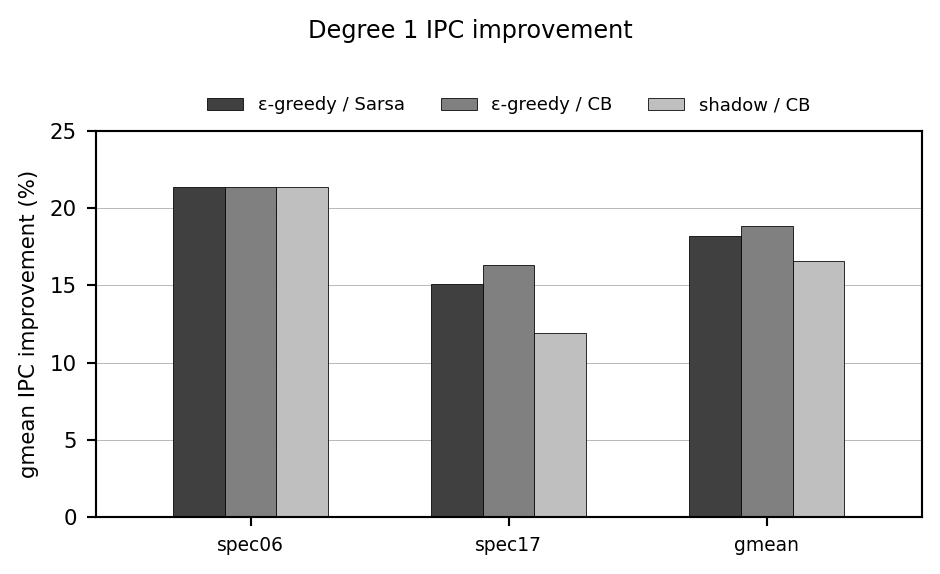

In [46]:
reload(plot)
plot.plot_suite_statistic(
    action_study_df, "cpu.gmean.ipc_improvement", 
    suites=suites,
    add_mean=True,
    colors=action_study_colors, 
    label_kwargs=action_study_label_kwargs,
    legend_kwargs=action_study_legend_kwargs,
    add_suptitle=True,
    suptitle="Degree 1 IPC improvement",
    add_xlabel=False,
    ylabel="gmean IPC improvement (%)",
    ylim=(0, 25),
    ytick_distance=5,
    dpi=dpi, figsize=(5, 3))

### spec06

In [47]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec06", "cpu.gmean.ipc_improvement").T

,ε-greedy / Sarsa,ε-greedy / CB,shadow / CB
GemsFDTD,44.110000,44.050000,43.620000
astar,6.520000,6.670000,6.930000
bwaves,39.020000,38.810000,44.820000
cactusADM,61.560000,61.560000,52.950000
gcc,12.600000,13.040000,12.500000
lbm,26.420000,25.650000,6.980000
leslie3d,14.330000,14.340000,16.710000
libquantum,24.690000,23.660000,38.790000
mcf,16.820000,17.870000,12.480000
milc,9.530000,9.370000,12.030000


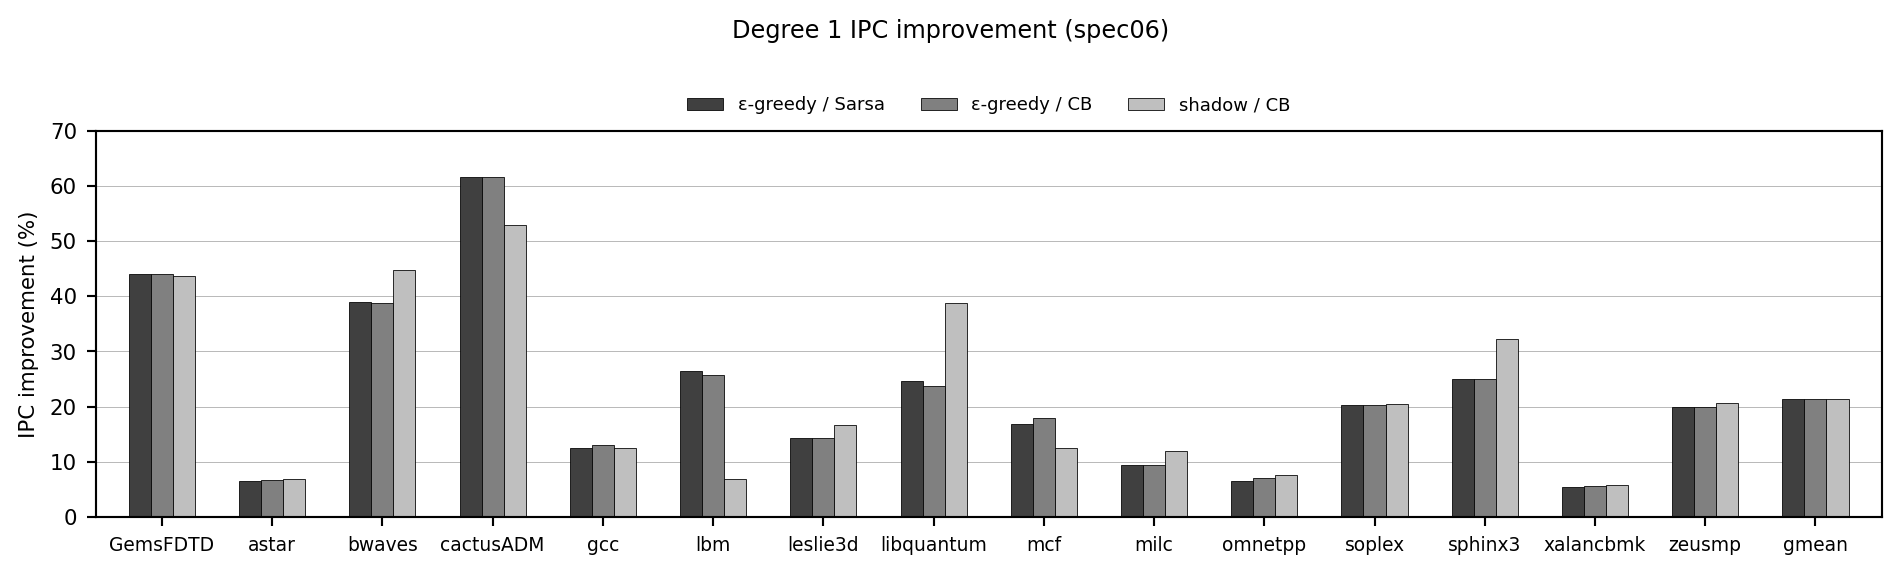

In [48]:
reload(plot)
plot.plot_benchmark_statistic(
    action_study_df, "spec06", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=action_study_colors,
    legend_kwargs=action_study_legend_kwargs,
    label_kwargs=action_study_label_kwargs,
    add_suptitle=True,
    suptitle="Degree 1 IPC improvement (spec06)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 70),
    ytick_distance=10,
    dpi=dpi, figsize=(10, 3))
plt.savefig("cygnus_actiondist_ipc_spec06.png", bbox_inches="tight")

### spec17

In [49]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec17", "cpu.gmean.ipc_improvement").T

,ε-greedy / Sarsa,ε-greedy / CB,shadow / CB
602.gcc,50.820000,51.380000,36.560000
605.mcf,6.290000,5.890000,7.230000
607.cactuBSSN,38.710000,37.550000,28.290000
619.lbm,12.180000,11.990000,5.450000
620.omnetpp,5.530000,5.470000,5.470000
623.xalancbmk,3.860000,7.490000,3.260000
627.cam4,0.880000,1.000000,0.910000
628.pop2,6.420000,6.290000,6.660000
649.fotonik3d,20.550000,29.600000,18.820000
gmean,15.073984,16.307785,11.937075


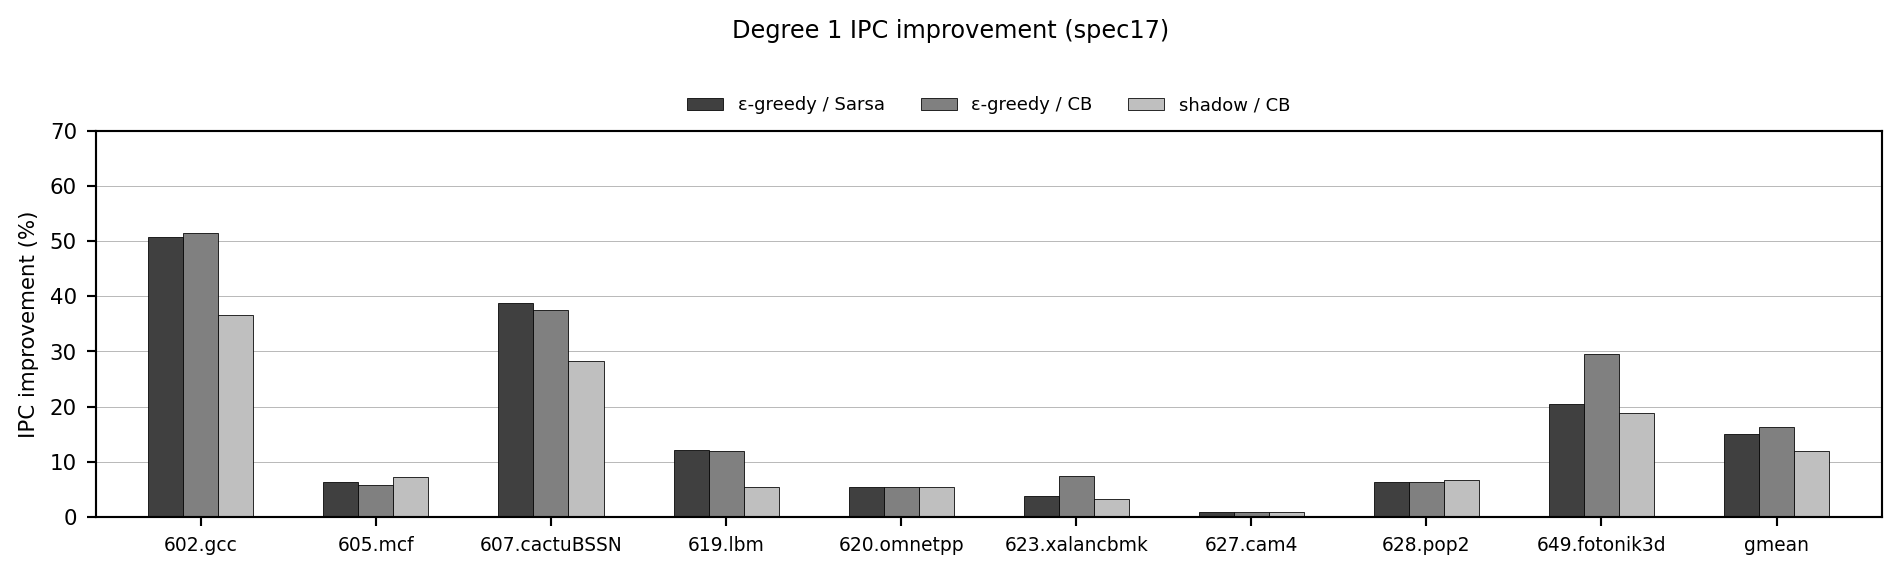

In [50]:
reload(plot)
plot.plot_benchmark_statistic(
    action_study_df, "spec17", "cpu.gmean.ipc_improvement",
    add_mean=True,
    colors=action_study_colors,
    legend_kwargs=action_study_legend_kwargs,
    label_kwargs=action_study_label_kwargs,
    add_suptitle=True,
    suptitle="Degree 1 IPC improvement (spec17)",
    add_xlabel=False,
    ylabel="IPC improvement (%)",
    ylim=(0, 70),
    ytick_distance=10,
    dpi=dpi, figsize=(10, 3))

## Accuracy

In [51]:
reload(plot)
plot.get_suite_table(action_study_df, "cache.L2C.amean.prefetch_accuracy", suites, add_mean=True)

,spec06,spec17,amean
ε-greedy / Sarsa,59.78,40.51,50.145
ε-greedy / CB,60.24,40.80,50.520
shadow / CB,59.18,39.55,49.365


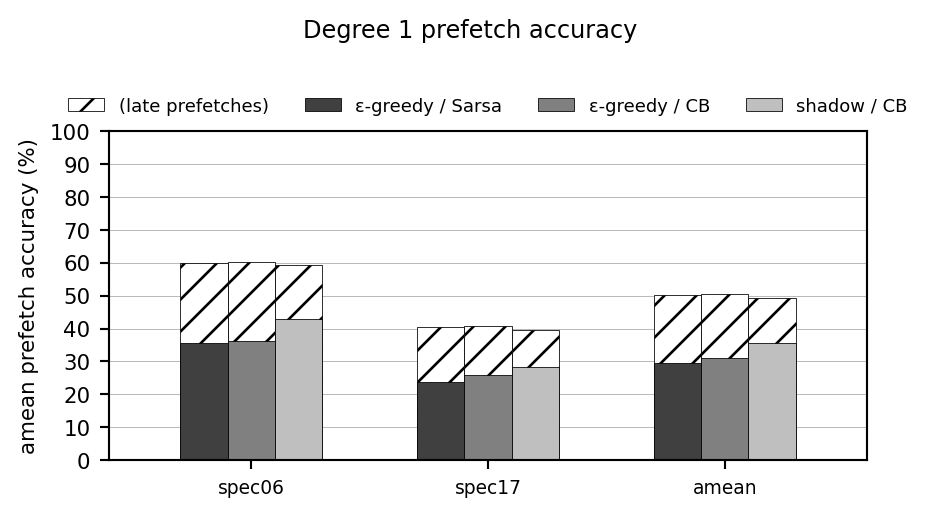

In [52]:
reload(plot)
plot.plot_suite_statistic(
    action_study_df, "cache.L2C.amean.prefetch_accuracy_timely",
    secondary_statistic_names=["cache.L2C.amean.prefetch_accuracy"],
    suites=suites,
    add_mean=True,
    colors=action_study_colors, 
    label_kwargs=action_study_label_kwargs,
    legend_kwargs=action_study_legend_kwargs_wide,
    add_suptitle=True,
    suptitle="Degree 1 prefetch accuracy",
    add_xlabel=False,
    ylabel="amean prefetch accuracy (%)",
    secondary_labels=["(late prefetches)"],
    secondary_colors=["white"],
    secondary_hatches=["//"],
    ylim=(0, 100),
    ytick_distance=10,
    dpi=dpi, figsize=(5, 2.7))

### spec06

In [53]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec06", "cache.L2C.amean.prefetch_accuracy").T

,ε-greedy / Sarsa,ε-greedy / CB,shadow / CB
GemsFDTD,79.510000,80.220000,79.180000
astar,24.210000,24.310000,24.560000
bwaves,94.030000,93.880000,93.980000
cactusADM,60.210000,60.210000,60.460000
gcc,37.960000,38.680000,38.760000
lbm,99.930000,99.920000,99.920000
leslie3d,79.220000,79.280000,78.860000
libquantum,100.000000,100.000000,100.000000
mcf,26.810000,27.850000,23.450000
milc,92.820000,95.890000,88.010000


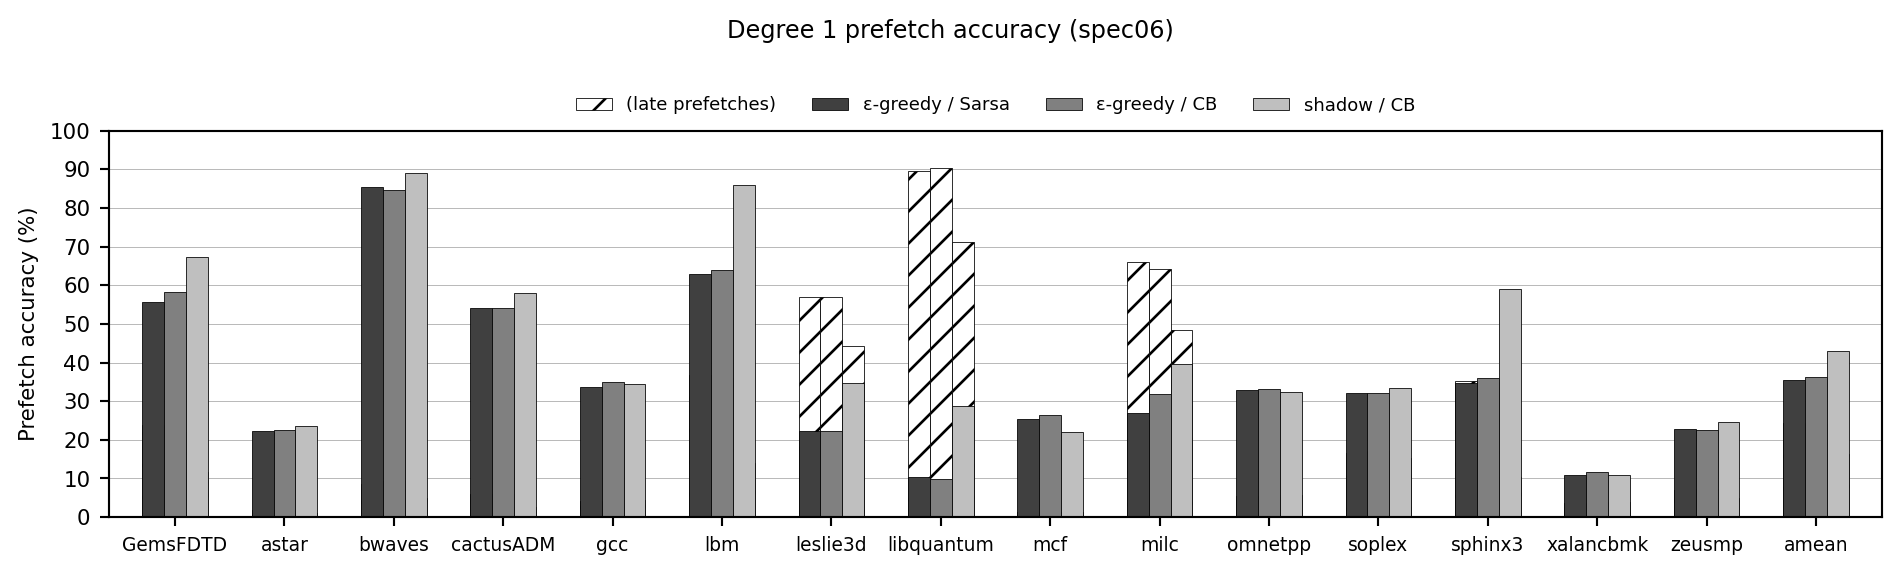

In [54]:
reload(plot)
plot.plot_benchmark_statistic(
    action_study_df, "spec06", "cache.L2C.amean.prefetch_accuracy_timely",
    secondary_statistic_names=["cache.L2C.amean.prefetch_accuracy_late"],
    add_mean=True,
    colors=action_study_colors,
    legend_kwargs=action_study_legend_kwargs_wide,
    label_kwargs=action_study_label_kwargs,
    add_suptitle=True,
    suptitle="Degree 1 prefetch accuracy (spec06)",
    add_xlabel=False,
    ylabel="Prefetch accuracy (%)",
    secondary_labels=["(late prefetches)"],
    secondary_colors=["white"],
    secondary_hatches=["//"],
    ylim=(0, 100),
    ytick_distance=10,
    dpi=dpi, figsize=(10, 3))
plt.savefig("cygnus_actiondist_accuracy_spec06.png", bbox_inches="tight")

### spec17

In [55]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec17", "cache.L2C.amean.prefetch_accuracy").T

,ε-greedy / Sarsa,ε-greedy / CB,shadow / CB
602.gcc,45.950000,46.430000,40.28
605.mcf,33.720000,33.890000,35.88
607.cactuBSSN,15.140000,15.430000,12.11
619.lbm,99.670000,99.640000,99.56
620.omnetpp,29.310000,29.350000,29.50
623.xalancbmk,23.110000,23.420000,22.72
627.cam4,14.280000,14.720000,13.78
628.pop2,37.990000,38.170000,38.35
649.fotonik3d,65.410000,66.130000,63.77
amean,40.508889,40.797778,39.55


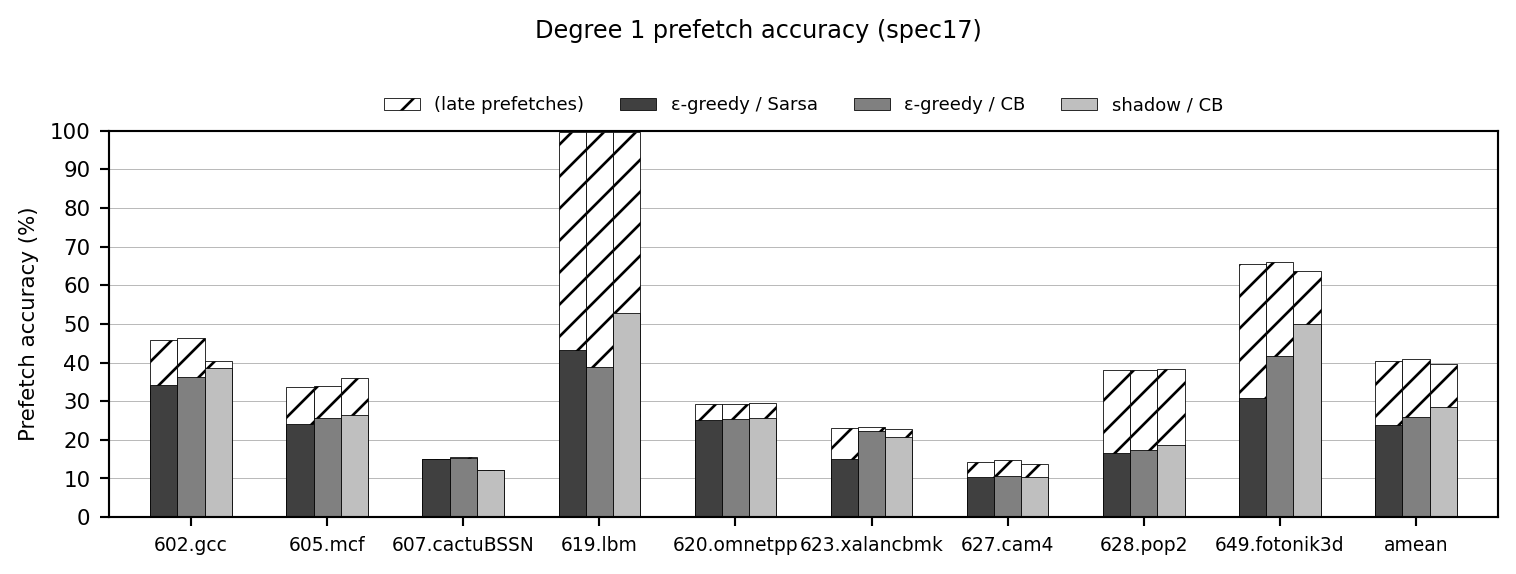

In [56]:
reload(plot)
plot.plot_benchmark_statistic(
    action_study_df, "spec17", "cache.L2C.amean.prefetch_accuracy_timely",
    secondary_statistic_names=["cache.L2C.amean.prefetch_accuracy"],
    add_mean=True,
    colors=action_study_colors,
    legend_kwargs=action_study_legend_kwargs_wide,
    label_kwargs=action_study_label_kwargs,
    add_suptitle=True,
    suptitle="Degree 1 prefetch accuracy (spec17)",
    add_xlabel=False,
    ylabel="Prefetch accuracy (%)",
    secondary_labels=["(late prefetches)"],
    secondary_colors=["white"],
    secondary_hatches=["//"],
    ylim=(0, 100),
    ytick_distance=10,
    dpi=dpi, figsize=(8, 3))

## Coverage

In [57]:
reload(plot)
plot.get_suite_table(action_study_df, "cache.L2C.amean.prefetch_coverage", suites, add_mean=True)

,spec06,spec17,amean
ε-greedy / Sarsa,28.50,13.32,20.910
ε-greedy / CB,28.71,15.70,22.205
shadow / CB,33.11,15.53,24.320


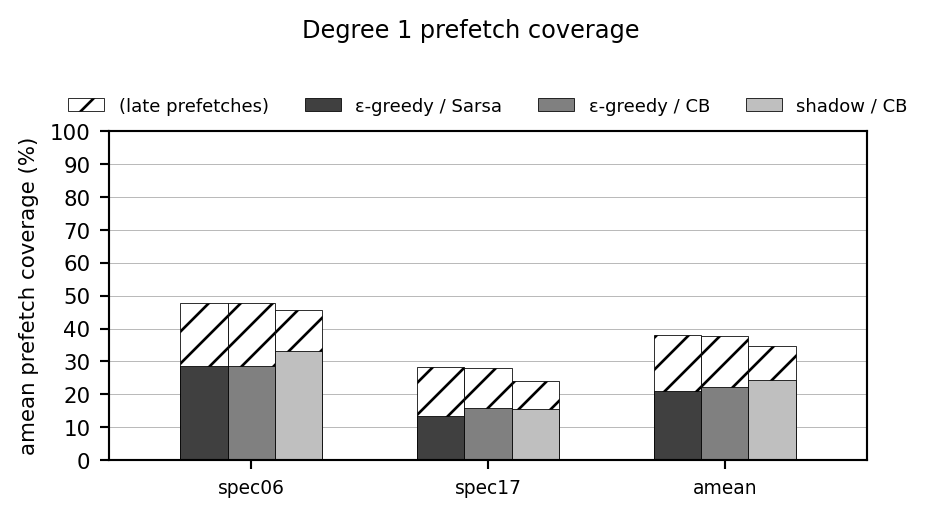

In [58]:
reload(plot)
plot.plot_suite_statistic(
    action_study_df, "cache.L2C.amean.prefetch_coverage",
    secondary_statistic_names=["cache.L2C.amean.prefetch_coverage_untimely"],
    suites=suites,
    add_mean=True,
    colors=action_study_colors, 
    label_kwargs=action_study_label_kwargs,
    legend_kwargs=action_study_legend_kwargs_wide,
    add_suptitle=True,
    suptitle="Degree 1 prefetch coverage",
    add_xlabel=False,
    ylabel="amean prefetch coverage (%)",
    secondary_labels=["(late prefetches)"],
    secondary_colors=["white"],
    secondary_hatches=["//"],
    ylim=(0, 100),
    ytick_distance=10,
    dpi=dpi, figsize=(5, 2.7))

### spec06

In [59]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec06", "cache.L2C.amean.prefetch_coverage").T

,ε-greedy / Sarsa,ε-greedy / CB,shadow / CB
GemsFDTD,56.850,57.530000,63.890000
astar,13.800,14.230000,17.000000
bwaves,64.670,62.730000,68.580000
cactusADM,61.790,61.790000,63.180000
gcc,21.030,21.440000,21.020000
lbm,12.170,12.270000,10.670000
leslie3d,19.860,19.810000,29.530000
libquantum,9.430,8.690000,25.150000
mcf,18.970,20.210000,13.990000
milc,11.800,13.060000,17.190000


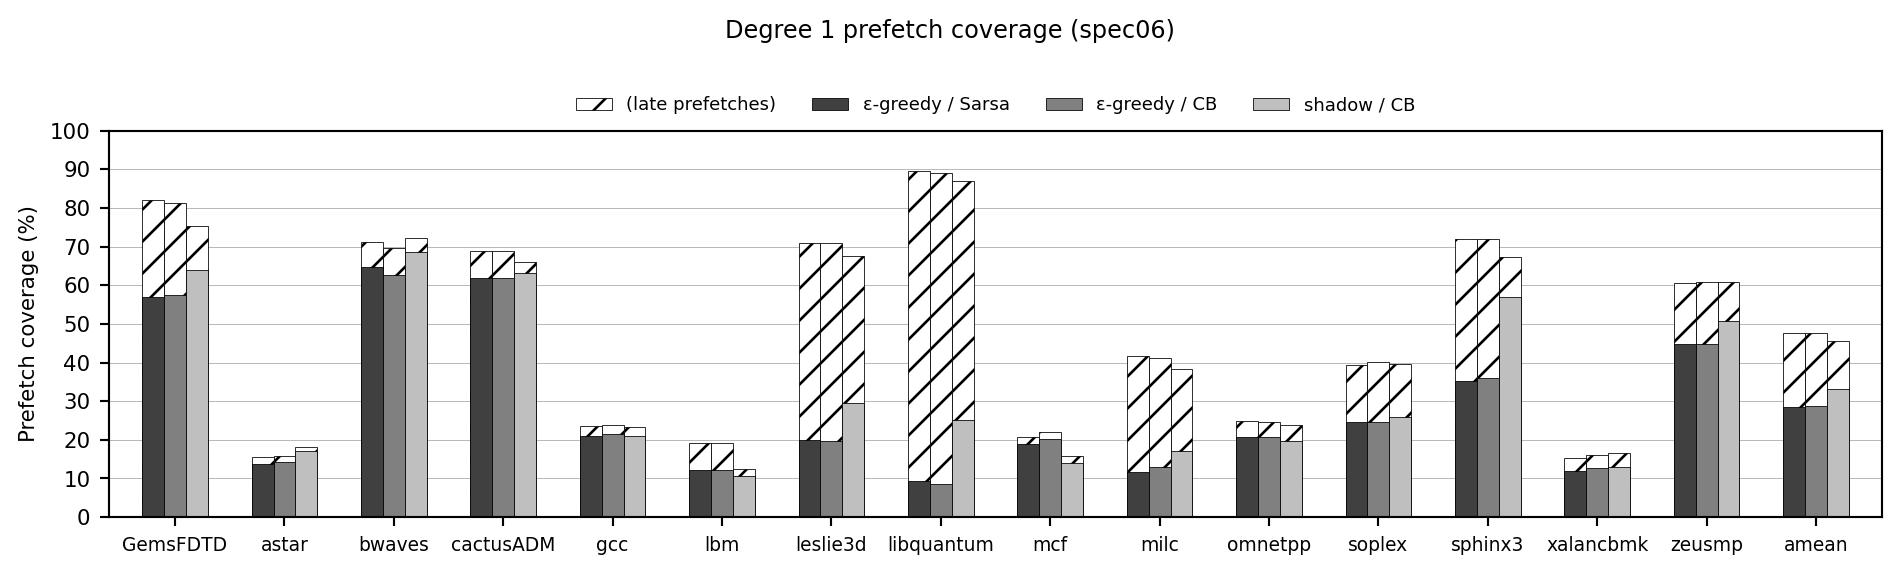

In [60]:
reload(plot)
plot.plot_benchmark_statistic(
    action_study_df, "spec06", "cache.L2C.amean.prefetch_coverage",
    secondary_statistic_names=["cache.L2C.amean.prefetch_coverage_untimely"],
    add_mean=True,
    colors=action_study_colors,
    legend_kwargs=action_study_legend_kwargs_wide,
    label_kwargs=action_study_label_kwargs,
    add_suptitle=True,
    suptitle="Degree 1 prefetch coverage (spec06)",
    add_xlabel=False,
    ylabel="Prefetch coverage (%)",
    secondary_labels=["(late prefetches)"],
    secondary_colors=["white"],
    secondary_hatches=["//"],
    ylim=(0, 100),
    ytick_distance=10,
    dpi=dpi, figsize=(10, 3))
plt.savefig("cygnus_actiondist_coverage_spec06.png", bbox_inches="tight")

### spec17

In [61]:
reload(plot)
plot.get_benchmark_table(action_study_df, "spec17", "cache.L2C.amean.prefetch_coverage").T

,ε-greedy / Sarsa,ε-greedy / CB,shadow / CB
602.gcc,59.670000,62.440000,56.950000
605.mcf,12.440000,14.480000,16.180000
607.cactuBSSN,52.140000,49.990000,48.370000
619.lbm,8.080000,7.060000,6.670000
620.omnetpp,13.330000,13.320000,14.520000
623.xalancbmk,-84.420000,-77.110000,-81.530000
627.cam4,4.710000,4.750000,5.530000
628.pop2,19.470000,20.440000,22.170000
649.fotonik3d,34.450000,45.910000,50.960000
amean,13.318889,15.697778,15.535556


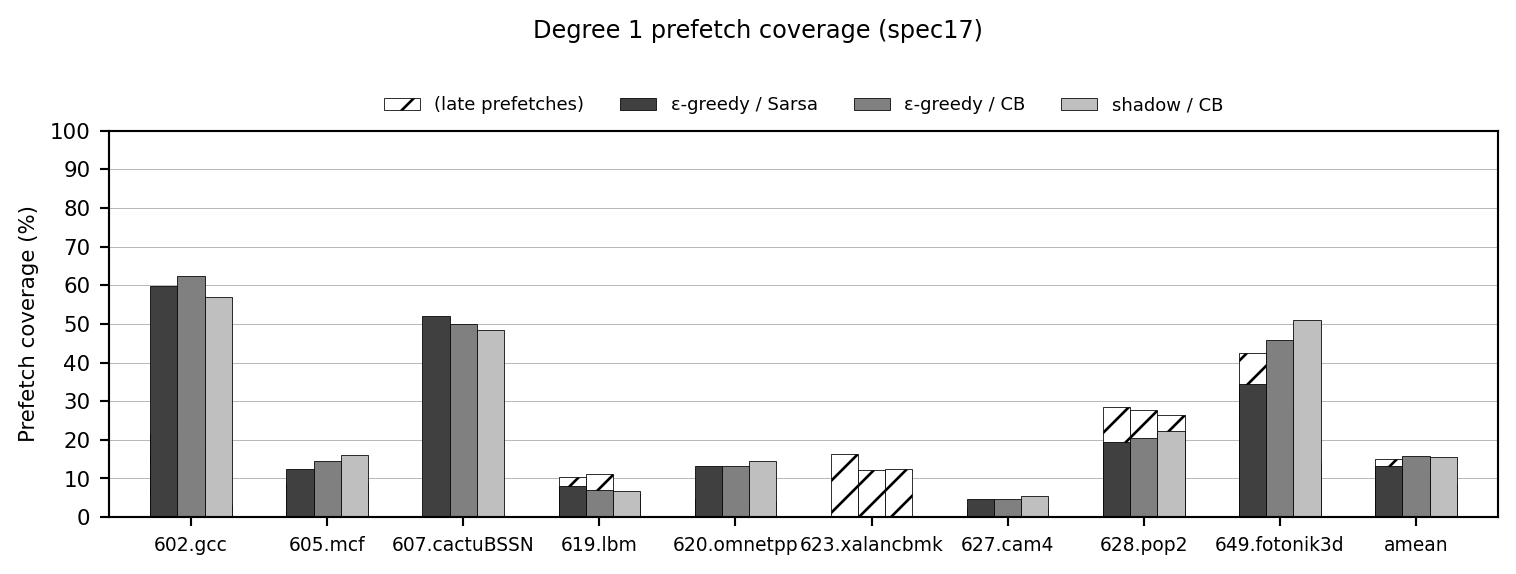

In [62]:
reload(plot)
plot.plot_benchmark_statistic(
    action_study_df, "spec17", "cache.L2C.amean.prefetch_coverage",
    secondary_statistic_names=["cache.L2C.amean.prefetch_coverage_late"],
    add_mean=True,
    colors=action_study_colors,
    legend_kwargs=action_study_legend_kwargs_wide,
    label_kwargs=action_study_label_kwargs,
    add_suptitle=True,
    suptitle="Degree 1 prefetch coverage (spec17)",
    add_xlabel=False,
    ylabel="Prefetch coverage (%)",
    secondary_labels=["(late prefetches)"],
    secondary_colors=["white"],
    secondary_hatches=["//"],
    ylim=(0, 100),
    ytick_distance=10,
    dpi=dpi, figsize=(8, 3))

## Overpredictions
**TODO**

# Action analysis

In [63]:
def parse_cygnus_actions(out_path: str()) -> dict:
    action_dist = {}
    action_count = {}
    with naboo_open(out_path) as f:
        in_action_dist_table = False
        in_action_stats_table = False

        done_action_dist_table = False
        done_action_stats_table = False

        for line in f:
            line = line.decode("utf-8")
            # Action distribution table
            if line.startswith("cygnus action distribution"):
                # Start of table
                in_action_dist_table = True
            if in_action_dist_table:
                tokens = line.split("|")
                if len(tokens) == 2 and tokens[0].strip() != "Threshold":
                    threshold, avg_count = float(tokens[0].strip()), float(tokens[1].strip())
                    action_dist[threshold] = avg_count
                if line == "\n":
                    # End of table
                    in_action_dist_table = False
                    done_action_dist_table = True


            # Action count table
            if line.startswith("cygnus action statistics"):
                # Start of table
                in_action_stats_table = True
            if in_action_stats_table:
                tokens = line.split("|")
                #print(tokens)
                if len(tokens) == 7 and tokens[0].strip() != "Action" and tokens[0].strip() != "total":
                    action, count = int(tokens[0].strip()), int(tokens[1].strip())
                    action_count[action] = count
                if line == "\n":
                    # End of table
                    in_action_stats_table = False
                    done_action_stats_table = True
            
            # Stop when both tables have been parsed
            if done_action_dist_table and done_action_stats_table:
                break

    data = {}
    data["score dist"] = action_dist
    data["action dist"] = action_count

    # Action distribution
    if "pythia" in out_path:
        data["score dist"] = {k / 3: v for k, v in data["score dist"].items()}

    # Most frequent action
    total_actions = sum(data["action dist"].values())
    most_freq_action = sorted(data["action dist"], key=data["action dist"].get)[-1]
    second_most_freq_action = sorted(data["action dist"], key=data["action dist"].get)[-2]

    data["most freq action pct"] = data["action dist"][most_freq_action] / total_actions * 100.0
    data["second most freq action pct"] = data["action dist"][second_most_freq_action] / total_actions * 100.0

    return data

def average_stats(stats: List[dict], weights: Optional[List[float]] = None) -> dict:
    """Produce an amean average for each stat."""
    new_stats = {}
    for k, v in stats[0].items():
        if isinstance(v, dict):
            new_stats[k] = average_stats([s[k] for s in stats], weights)
        elif weights is None:
            new_stats[k] = np.average([s[k] for s in stats])
        else:
            new_stats[k] = np.average([s[k] for s in stats], weights=weights)
    return new_stats

In [64]:
def collate_cygnus_actions(study_dir: str, experiment: str, benchmarks: List[str], weights: dict):
    experiment_dir = os.path.join(study_dir, experiment)
    benchmarks_data = {}
    for benchmark in benchmarks:
        benchmark_dir = os.path.join(experiment_dir, benchmark)
        benchmark_phase_data = []
        benchmark_weights = []
        for phase, weight in weights[benchmark].items():
            phase_file = os.path.join(benchmark_dir, f"{phase}.OUT.gz")
            phase_data = parse_cygnus_actions(phase_file)
            benchmark_phase_data.append(phase_data)
            benchmark_weights.append(weight)
        benchmark_data = average_stats(benchmark_phase_data, benchmark_weights)
        benchmarks_data[benchmark] = benchmark_data

    benchmarks_data["average"] = average_stats(list(benchmarks_data.values()))
    return benchmarks_data

In [65]:
# Load experiment action data
benchmarks = sorted(list(studies["prefetchers_actionstudy"].tabler.get_benchmarks()))
benchmarks.remove("omnetpp") # Deadlock
benchmarks.remove("605.mcf") # Deadlock
weights = toml.load(weights_path)

experiments_data = {}
experiments = [
    "cygnus_pythialike__deg1",
    "cygnus_pythialike_bandit__deg1",
    "cygnus_pythialike_shadowprefetch__deg1",
    "cygnus_depth__deg1",
]
for experiment in experiments:
    experiment_data = collate_cygnus_actions(os.path.join(sim_dir, "prefetchers_actionstudy"),
                                             experiment, benchmarks, weights)
    experiments_data[experiment] = experiment_data

## Action score distribution

In [66]:
def plot_score_dist(distributions: dict, title: str = "", ymax: int = 20):
    fig, ax = plt.subplots(figsize=(5, 3), dpi=dpi)

    markers = [".", "^", "*"]

    for i, (exp, data) in enumerate(distributions.items()):
        X = np.array(list(data["score dist"].keys()))
        y = np.array(list(data["score dist"].values()))

        ax.plot(X, y, color=str(i / len(distributions)), label=exp, marker=markers[i])

    ax.set_xlabel("Q-value score")
    ax.set_ylabel("Avg # of actions > score")
    ax.set_title(title)

    ax.grid(axis="both", alpha=0.5)
    ax.set_xlim(0, 20)
    ax.set_ylim(0, ymax)
    #ax.set_yticks(np.arange(0, 16, 2))
    ax.set_axisbelow(True)
    ax.legend()

    # Initial Q-value (Q_0)
    ax.axvline(6.71, color='0.66', linestyle='--')
    ax.annotate("$Q_0$", (6.71 - 1.2, ymax - 1), color='0.66', fontsize=8)

    # Accurate, late Q-value (R_AL)
    ax.axvline(12.0, color='0.66', linestyle='--')
    ax.annotate("$R_{AL}$", (12.0 - 1.2, ymax - 1), color='0.66', fontsize=8)


    fig.tight_layout()

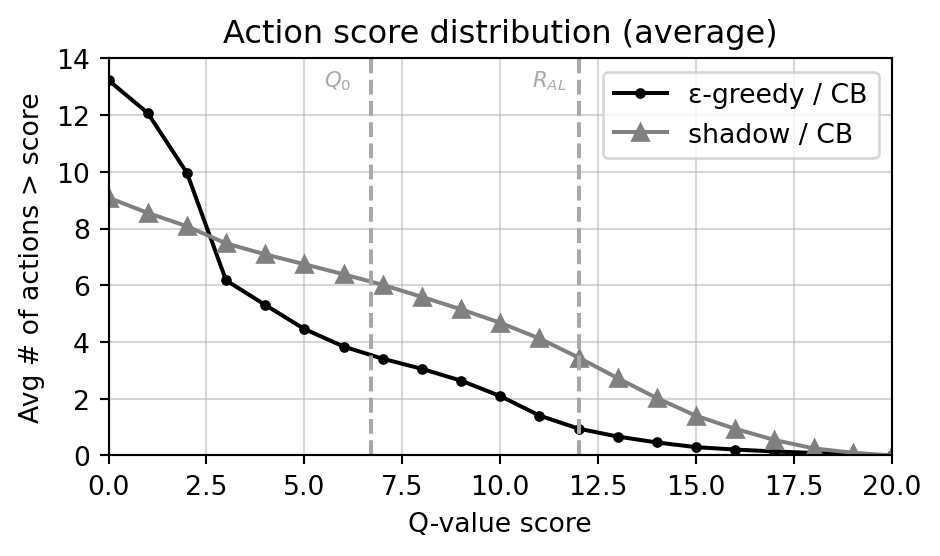

In [67]:
action_score_bk = "average"
score_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=14)
plt.savefig("cygnus_score_dist.pdf", bbox_inches="tight")
plt.savefig("cygnus_score_dist.png", bbox_inches="tight")

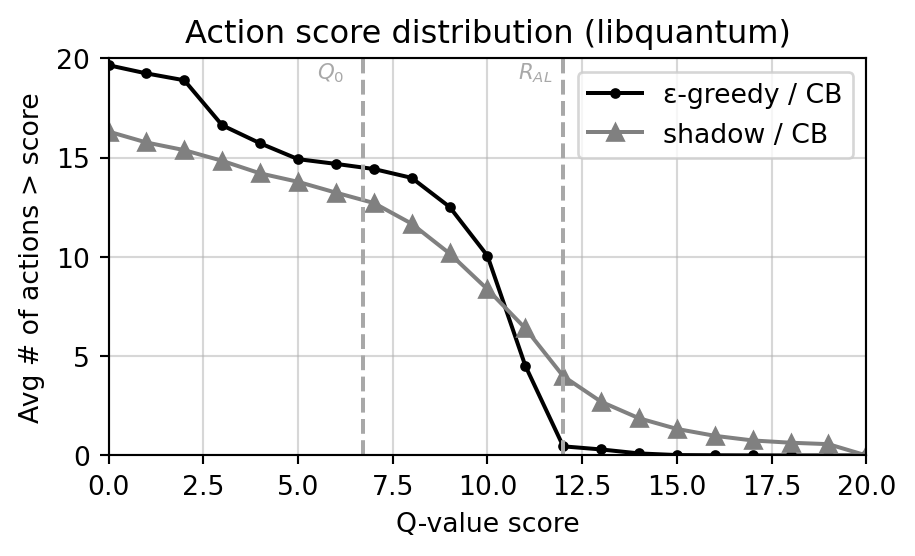

In [68]:
action_score_bk = "libquantum"
score_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

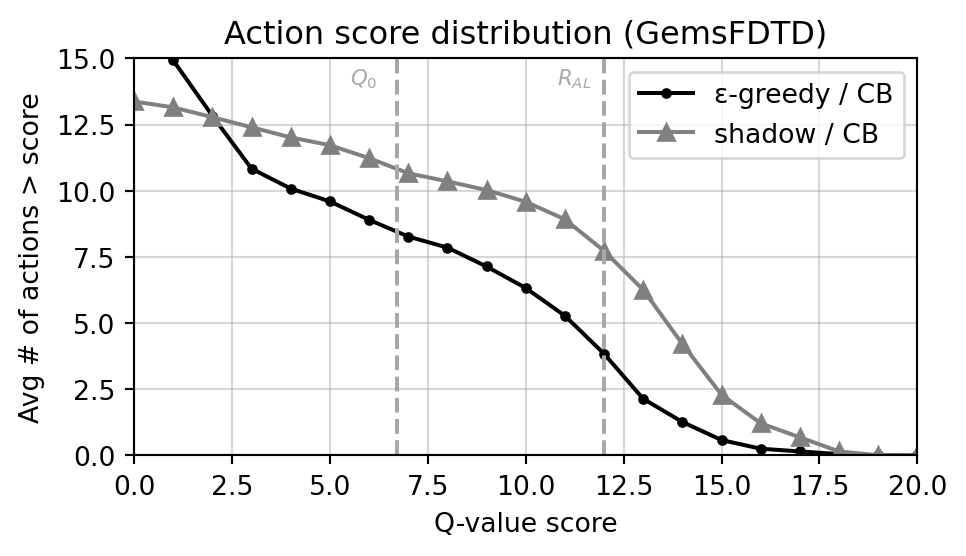

In [69]:
action_score_bk = "GemsFDTD"
score_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=15)

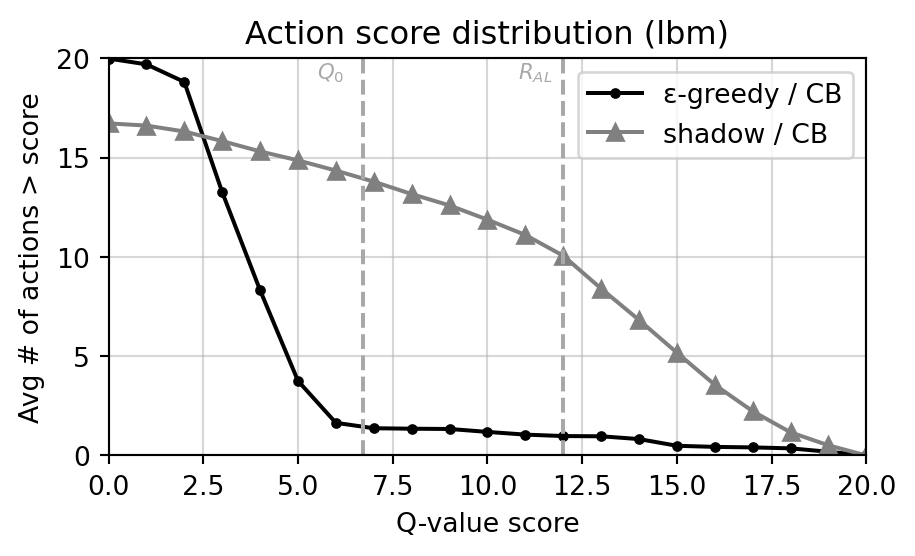

In [70]:
action_score_bk = "lbm"
score_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

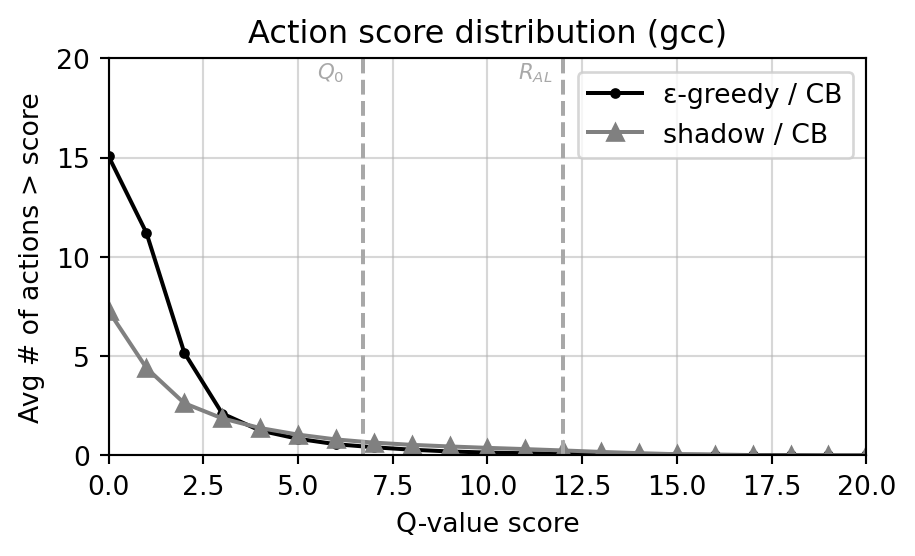

In [71]:
action_score_bk = "gcc"
score_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

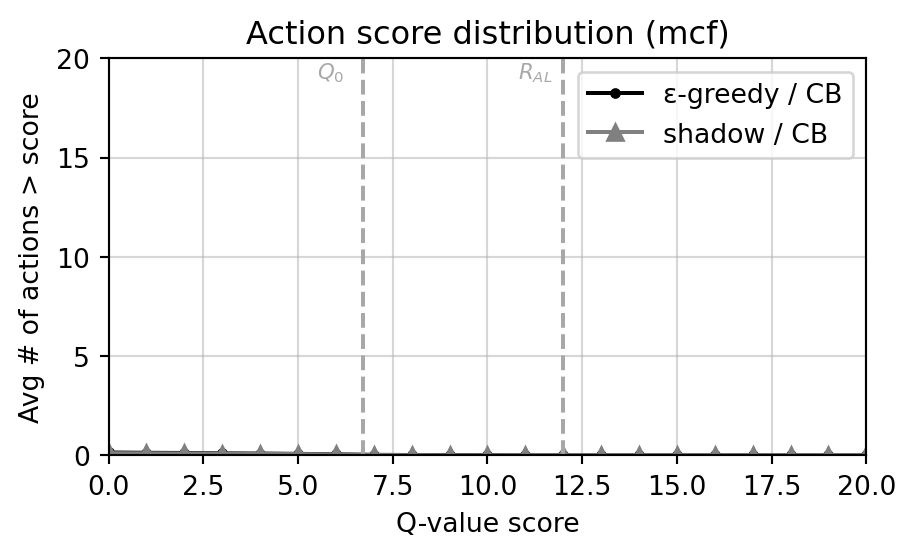

In [72]:
action_score_bk = "mcf"
score_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"][action_score_bk],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"][action_score_bk],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"][action_score_bk],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"][action_score_bk],
}

plot_score_dist(score_data, title=f"Action score distribution ({action_score_bk})", ymax=20)

In [73]:
def plot_action_freq(experiments_data: dict):
    benchmarks = set()
    for exp, data in experiments_data.items():
        #print(exp)
        #print(data.keys())
        benchmarks |= set(list(data.keys()))

    fig, ax = plt.subplots(figsize=(10, 3), dpi=dpi)
    benchmarks = sorted(list(benchmarks))
    benchmarks.remove("average")
    benchmarks.append("average")
    X = (len(experiments_data) + 1) * np.arange(len(benchmarks))
    for i, (exp, data) in enumerate(experiments_data.items()):
        y_mf = [data[benchmark]["most freq action pct"] for benchmark in benchmarks]
        y_smf = [data[benchmark]["second most freq action pct"] for benchmark in benchmarks]
        ax.bar(X + i, y_mf, 
               label=exp + " (most selected)", 
               width=0.85, linewidth=0.3,
               #color=f"C{i}",
               color=str(i * 1 / len(experiments_data)),
               edgecolor='black')
        ax.bar(X + i, y_smf, bottom=y_mf,
               label=("(second-most selected)" if i == len(experiments_data) - 1 else None), # Put label at end
               width=0.85, linewidth=0.3,
               color="white", edgecolor='black',
               hatch="\\\\\\")

    ax.set_xticks(X + 0.5)
    ax.set_xticklabels(benchmarks, rotation=60, fontsize=8)
    ax.set_xlim(-1.5, 3 * len(benchmarks) - 0.5)
    ax.set_ylabel("Action frequency (%)")
    ax.grid(axis="y", alpha=0.5)
    ax.set_axisbelow(True)

    fig.legend(loc="upper left", ncol=len(experiments_data) + 1, bbox_to_anchor=(0.065, 1.05), fontsize=8)
    fig.tight_layout()


## Action frequency

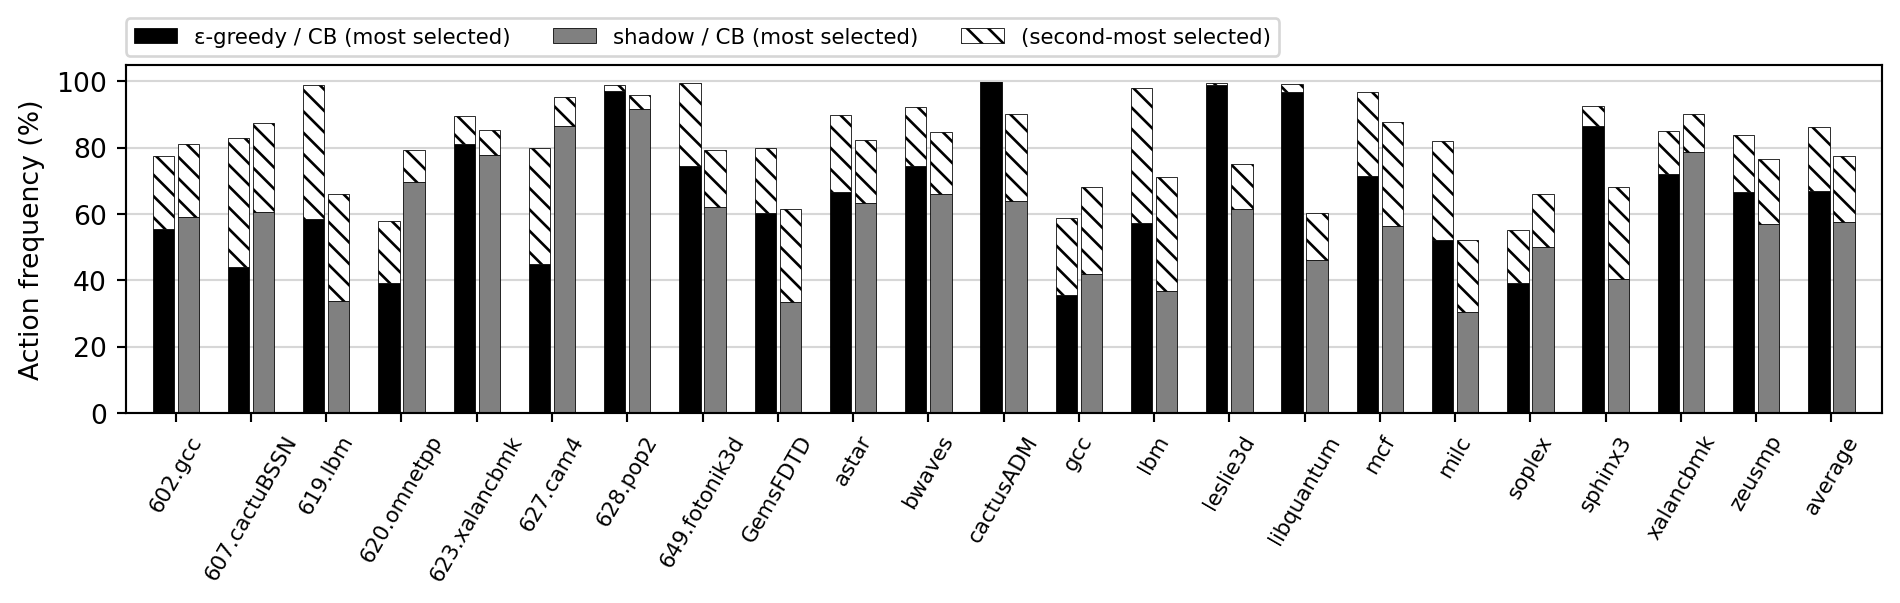

In [74]:
freq_data = {
    "ε-greedy / CB": experiments_data["cygnus_pythialike_bandit__deg1"],
    #"ε-greedy / Sarsa": experiments_data["cygnus_pythialike__deg1"],
    "shadow / CB": experiments_data["cygnus_pythialike_shadowprefetch__deg1"],
    #"shadow / CB (Cygnus)": experiments_data["cygnus_depth__deg1"],
}

plot_action_freq(freq_data)
plt.savefig("cygnus_action_freq.pdf", bbox_inches="tight")
plt.savefig("cygnus_action_freq.png", bbox_inches="tight")